# 1.  Salary Survey data

## 1-1. Loading data

In [1]:
# Table 5.1 Salary Survey Data

dat <- read.table("salary_survey.txt",header=T)
head(dat)
tail(dat)
dim(dat)

S,X,E,M
13876,1,1,1
11608,1,3,0
18701,1,3,1
11283,1,2,0
11767,1,3,0
20872,2,2,1


,S,X,E,M
41,25685,15,3,1
42,27837,16,2,1
43,18838,16,2,0
44,17483,16,1,0
45,19207,17,2,0
46,19346,20,1,0


[1] 46  4

In [2]:
# Generating indicator variables, E1 and E2
dat$E1 = 0
dat$E2 = 0

dat$E1[which(dat$E==1)] = 1
dat$E2[which(dat$E==2)] = 1

In [3]:
head(dat)

S,X,E,M,E1,E2
13876,1,1,1,1,0
11608,1,3,0,0,0
18701,1,3,1,0,0
11283,1,2,0,0,1
11767,1,3,0,0,0
20872,2,2,1,0,1


## 1-2.  Multiple Linear Regression (132 page)

S = β0 + β1X + γ1E1 + γ2E2 + δ1M + ε (5.1)

In [4]:
# linear model fit
attach(dat)
res_lm <- lm(S ~ X + E1 + E2 + M)
summary(res_lm)


Call:
lm(formula = S ~ X + E1 + E2 + M)

Residuals:
     Min       1Q   Median       3Q      Max 
-1884.60  -653.60    22.23   844.85  1716.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11031.81     383.22  28.787  < 2e-16 ***
X             546.18      30.52  17.896  < 2e-16 ***
E1          -2996.21     411.75  -7.277 6.72e-09 ***
E2            147.82     387.66   0.381    0.705    
M            6883.53     313.92  21.928  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1027 on 41 degrees of freedom
Multiple R-squared:  0.9568,	Adjusted R-squared:  0.9525 
F-statistic: 226.8 on 4 and 41 DF,  p-value: < 2.2e-16


In [5]:
# Table 5.3 Regression Analysis of Salary Survey Data (132 page)
summary(res_lm)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11031.8079,383.21713,28.787356,8.086512e-29
X,546.1840,30.51919,17.896411,5.546313e-21
E1,-2996.2103,411.75271,-7.276723,6.722373e-09
E2,147.8249,387.65932,0.381327,7.049297e-01
M,6883.5310,313.91898,21.927731,2.901444e-24


In [6]:
cat("R2=", round(summary(res_lm)$r.squared, 3),
    ", R2_adj=" , round(summary(res_lm)$adj.r.squared, 3),
    ", sigma=" , round(summary(res_lm)$sigma,3),
    ", df=" , summary(res_lm)$df[2])

R2= 0.957 , R2_adj= 0.953 , sigma= 1027.437 , df= 41

Figure 5.1 Standardized residuals versus years of experience (134 page)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


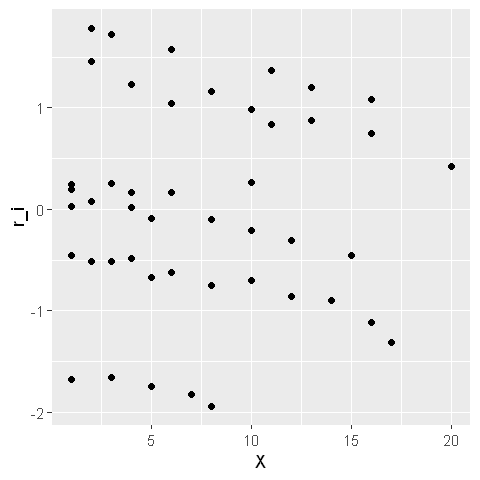

In [7]:
# plot size
options(repr.plot.width = 4, repr.plot.height = 4)

# residual plot
res.dat <- cbind(dat, rstandard(res_lm))
colnames(res.dat)[c(7)] <- "r_i"

library(ggplot2)
p1 <- ggplot(res.dat, aes(x = X, y = r_i)) + geom_point()
p1

Figure 5.2 Standardized residuals versus education-management categorical variable
(134 page)

In [8]:
res.dat$Category = 0
res.dat$Category[which(res.dat$E==1 & res.dat$M==0)]=1
res.dat$Category[which(res.dat$E==1 & res.dat$M==1)]=2
res.dat$Category[which(res.dat$E==2 & res.dat$M==0)]=3
res.dat$Category[which(res.dat$E==2 & res.dat$M==1)]=4
res.dat$Category[which(res.dat$E==3 & res.dat$M==0)]=5
res.dat$Category[which(res.dat$E==3 & res.dat$M==1)]=6

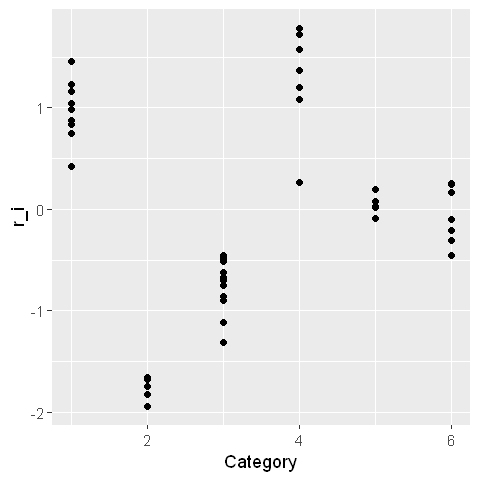

In [9]:
p2 <- ggplot(res.dat, aes(x = Category, y = r_i)) + geom_point()
p2

## 1-3.  Interaction Varibles (132 page)

S = β0 + β1X + γ1E1 + γ2E2 + δ1M + α1(E1 · M) + α2(E2 · M) + ε (5.2)

In [10]:
# expanded model fit
res_lm_exp <- lm(S ~ X + E1 + E2 + M + E1*M + E2*M)
summary(res_lm_exp)


Call:
lm(formula = S ~ X + E1 + E2 + M + E1 * M + E2 * M)

Residuals:
    Min      1Q  Median      3Q     Max 
-928.13  -46.21   24.33   65.88  204.89 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11203.434     79.065 141.698  < 2e-16 ***
X             496.987      5.566  89.283  < 2e-16 ***
E1          -1730.748    105.334 -16.431  < 2e-16 ***
E2           -349.078     97.568  -3.578 0.000945 ***
M            7047.412    102.589  68.695  < 2e-16 ***
E1:M        -3066.035    149.330 -20.532  < 2e-16 ***
E2:M         1836.488    131.167  14.001  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 173.8 on 39 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9986 
F-statistic:  5517 on 6 and 39 DF,  p-value: < 2.2e-16


In [11]:
# Table 5.4 Regression Analysis of Salary Survey Data: Expanded Model (135 page)
summary(res_lm_exp)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11203.4338,79.065447,141.698228,1.622328e-54
X,496.9870,5.566415,89.283136,1.021062e-46
E1,-1730.7483,105.333886,-16.431069,4.013497e-19
E2,-349.0777,97.567899,-3.577792,9.451149e-04
M,7047.4120,102.589193,68.695462,2.637477e-42
E1:M,-3066.0351,149.330440,-20.531883,1.635213e-22
E2:M,1836.4879,131.167360,14.001105,8.506725e-17


In [12]:
cat("R2=", round(summary(res_lm_exp)$r.squared, 3),
    ", R2_adj=" , round(summary(res_lm_exp)$adj.r.squared, 3),
    ", sigma=" , round(summary(res_lm_exp)$sigma,3),
    ", df=" , summary(res_lm_exp)$df[2])

R2= 0.999 , R2_adj= 0.999 , sigma= 173.809 , df= 39

In [13]:
# observation 33 Deleted
sub.dat <- dat[-33,]

In [14]:
# expanded model fit, observation 33 deleted
sub_res_lm_exp <- lm(S ~ X + E1 + E2 + M + E1*M + E2*M, data= sub.dat)
summary(sub_res_lm_exp)


Call:
lm(formula = S ~ X + E1 + E2 + M + E1 * M + E2 * M, data = sub.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.884  -43.636   -5.036   46.622  128.480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11199.714     30.533 366.802  < 2e-16 ***
X             498.418      2.152 231.640  < 2e-16 ***
E1          -1741.336     40.683 -42.803  < 2e-16 ***
E2           -357.042     37.681  -9.475 1.49e-11 ***
M            7040.580     39.619 177.707  < 2e-16 ***
E1:M        -3051.763     57.674 -52.914  < 2e-16 ***
E2:M         1997.531     51.785  38.574  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67.12 on 38 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 3.543e+04 on 6 and 38 DF,  p-value: < 2.2e-16


In [15]:
# Table 5.5 Regression Analysis of Salary Survey Data: Expanded Model,Observation 33 deleted. (135 page)
summary(sub_res_lm_exp)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),11199.7138,30.533380,366.802294,4.724873e-69
X,498.4178,2.151688,231.640356,1.804860e-61
E1,-1741.3359,40.682501,-42.803070,9.201707e-34
E2,-357.0423,37.681145,-9.475356,1.493778e-11
M,7040.5801,39.619066,177.706870,4.232962e-57
E1:M,-3051.7633,57.674199,-52.913839,3.318865e-37
E2:M,1997.5306,51.784982,38.573550,4.397259e-32


In [16]:
cat("R2=", round(summary(sub_res_lm_exp)$r.squared, 3),
    ", R2_adj=" , round(summary(sub_res_lm_exp)$adj.r.squared, 3),
    ", sigma=" , round(summary(sub_res_lm_exp)$sigma,3),
    ", df=" , summary(sub_res_lm_exp)$df[2])

R2= 1 , R2_adj= 1 , sigma= 67.119 , df= 38

Figure 5.3 Standardized residuals versus years of experience: Expanded model (136
page)

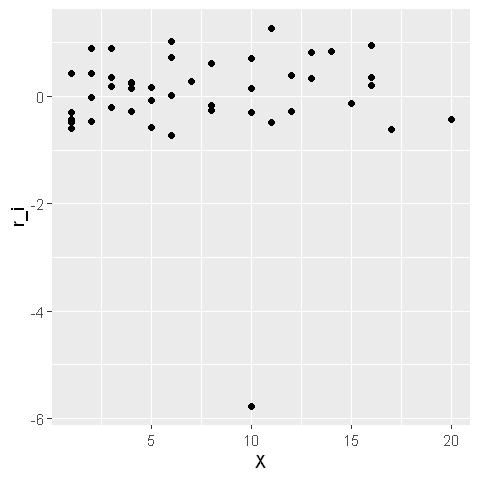

In [17]:
# residual plot
res.dat_exp <- cbind(dat, rstandard(res_lm_exp))
colnames(res.dat_exp)[c(7)] <- "r_i"

ggplot(res.dat_exp, aes(x = X, y = r_i)) + geom_point()

Figure 5.4 Standardized residuals versus years of experience: Expanded model, observation 33 deleted (136 page)

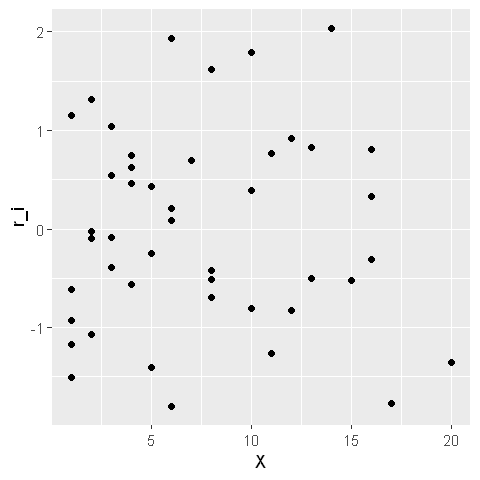

In [18]:
# residual plot
res.sub_dat_exp <- cbind(sub.dat, rstandard(sub_res_lm_exp))
colnames(res.sub_dat_exp)[c(7)] <- "r_i"

ggplot(res.sub_dat_exp, aes(x = X, y = r_i)) + geom_point()

Figure 5.5 Standardized residuals versus education-management categorical variable:
Expanded model, observation 33 deleted. (136 page)

In [19]:
res.sub_dat_exp$Category = 0
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==1 & res.sub_dat_exp$M==0)]=1
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==1 & res.sub_dat_exp$M==1)]=2
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==2 & res.sub_dat_exp$M==0)]=3
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==2 & res.sub_dat_exp$M==1)]=4
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==3 & res.sub_dat_exp$M==0)]=5
res.sub_dat_exp$Category[which(res.sub_dat_exp$E==3 & res.sub_dat_exp$M==1)]=6

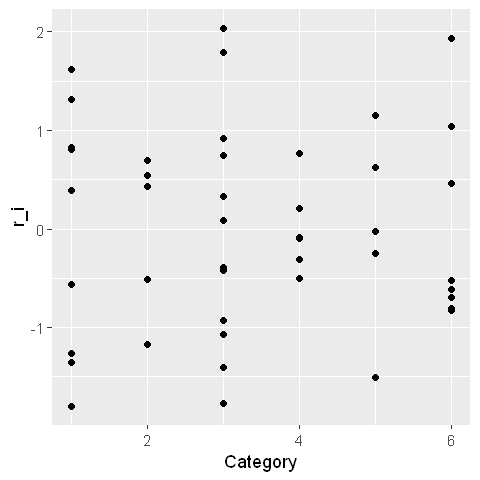

In [20]:
 ggplot(res.sub_dat_exp, aes(x = Category, y = r_i)) + geom_point()

# 2.  Pre-employment Testing Program data

## 2-1. Loading data

In [21]:
# Table 5.7 Data on Preemployment Testing Program

dat_emp <- read.table("preemployment_test_program.txt",header=T)
head(dat_emp)
tail(dat_emp)
dim(dat_emp)

TEST,RACE,JPERF
0.28,1,1.83
0.97,1,4.59
1.25,1,2.97
2.46,1,8.14
2.51,1,8.00
1.17,1,3.30


,TEST,RACE,JPERF
15,2.09,0,6.56
16,1.50,0,3.00
17,1.25,0,5.85
18,0.72,0,1.90
19,0.42,0,3.85
20,1.53,0,2.95


[1] 20  3

## 2-2. Two Models

Model 1: yij = β0 + β1xij + εij Model 3: yij = β0 + β1xij + δ(zij · xij ) + εij (5.4)

In [22]:
# Model1 fit
res_m1 <- lm(JPERF ~ TEST, data = dat_emp)

# Table 5.8 Regression Results, Preemployment Testing Data: Model 1
summary(res_m1)$coefficients

cat("R2=", round(summary(res_m1)$r.squared, 3),
    ", R2_adj=" , round(summary(res_m1)$adj.r.squared, 3),
    ", sigma=" , round(summary(res_m1)$sigma,3),
    ", df=" , summary(res_m1)$df[2])

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.034973,0.8680312,1.192323,0.2486169239
TEST,2.360535,0.5380699,4.387041,0.0003555104


R2= 0.517 , R2_adj= 0.49 , sigma= 1.591 , df= 18

In [23]:
# Model3 fit
res_m3 <- lm(JPERF ~ TEST + RACE + RACE*TEST, data = dat_emp)

# Table 5.9 Regression Results, Preemployment Testing Data: Model 3
summary(res_m3)$coefficients

cat("R2=", round(summary(res_m3)$r.squared, 3),
    ", R2_adj=" , round(summary(res_m3)$adj.r.squared, 3),
    ", sigma=" , round(summary(res_m3)$sigma,3),
    ", df=" , summary(res_m3)$df[2])

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.010282,1.050112,1.914350,0.07363289
TEST,1.313402,0.670371,1.959217,0.06774914
RACE,-1.913167,1.540325,-1.242054,0.23211490
TEST:RACE,1.997546,0.954443,2.092892,0.05265012


R2= 0.664 , R2_adj= 0.601 , sigma= 1.407 , df= 16

In [24]:
# F-ratio
anova(res_m1, res_m3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
18,45.56830,NA,NA,NA,NA
16,31.65547,2,13.91282,3.516061,0.05423606


- Y1 = 0.10 + 3.31X1

In [25]:
cat("Y_1 = ", round(sum(res_m3$coefficients[c(1,3)]),2) ,
"+", round(sum(res_m3$coefficients[c(2,4)]),2),"X_1")

Y_1 =  0.1 + 3.31 X_1

- Y2 = 2.01 + 1.32X2

In [26]:
cat("Y_2 = ", round(sum(res_m3$coefficients[c(1)]),2) ,
"+", round(sum(res_m3$coefficients[c(2)]),2),"X_2")

Y_2 =  2.01 + 1.31 X_2

Figure 5.7 Standardized residuals versus test score: Model 1 (142 page)

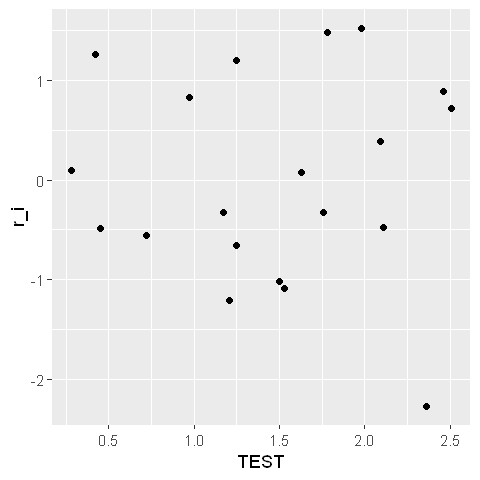

In [27]:
# residual plot
res.dat_emp <- cbind(dat_emp, rstandard(res_m1))
colnames(res.dat_emp)[c(4)] <- "r_i"

ggplot(res.dat_emp, aes(x = TEST, y = r_i)) + geom_point()

Figure 5.8 Standardized residuals versus test score: Model 3 (142 page)

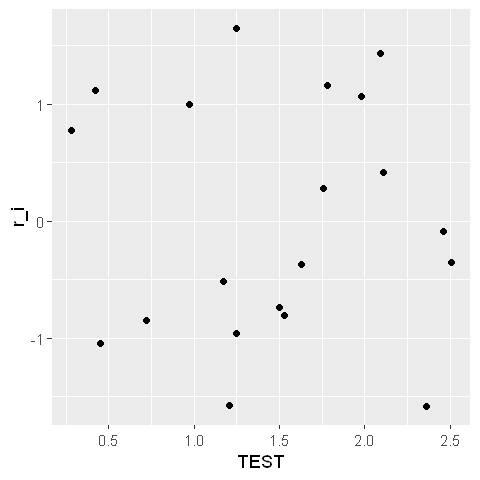

In [28]:
# residual plot
res.dat_emp <- cbind(dat_emp, rstandard(res_m3))
colnames(res.dat_emp)[c(4)] <- "r_i"

ggplot(res.dat_emp, aes(x = TEST, y = r_i)) + geom_point()

Figure 5.9 Standardized residuals versus RACE: Model 1 (143 page)

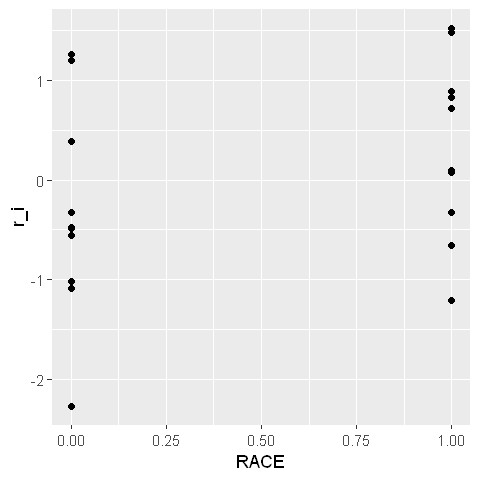

In [29]:
# residual plot
res.dat_emp <- cbind(dat_emp, rstandard(res_m1))
colnames(res.dat_emp)[c(4)] <- "r_i"

ggplot(res.dat_emp, aes(x = RACE, y = r_i)) + geom_point()

In [30]:
dat_emp_minority <- dat_emp[which(dat_emp$RACE==1),]
dat_emp_white <- dat_emp[which(dat_emp$RACE==0),]

In [31]:
res_m1_minority <- lm(JPERF ~ TEST, data = dat_emp_minority)
res_m1_white <- lm(JPERF ~ TEST, data = dat_emp_white)

In [32]:
# Table 5.10 Separate Regression Results (143 page)
cat("Sample = Minority",
    ",\t beta_0=", round(summary(res_m1_minority)$coefficients[1,1],2),
    ", beta_1=", round(summary(res_m1_minority)$coefficients[2,1],2),
    ", t_1=", round(summary(res_m1_minority)$coefficients[2,3],2),
    ", R2=", round(summary(res_m1_minority)$r.squared,2),
    ", sigma=", round(summary(res_m1_minority)$sigma,2),
    ", df=", summary(res_m1_minority)$df[2],"\n")

cat("Sample = White",
    ",\t beta_0=", round(summary(res_m1_white)$coefficients[1,1],2),
    ", beta_1=", round(summary(res_m1_white)$coefficients[2,1],2),
    ", t_1=", round(summary(res_m1_white)$coefficients[2,3],2),
    ", R2=", round(summary(res_m1_white)$r.squared,2),
    ", sigma=", round(summary(res_m1_white)$sigma,2),
    ", df=", summary(res_m1_white)$df[2])

Sample = Minority ,	 beta_0= 0.1 , beta_1= 3.31 , t_1= 5.31 , R2= 0.78 , sigma= 1.29 , df= 8 
Sample = White ,	 beta_0= 2.01 , beta_1= 1.31 , t_1= 1.82 , R2= 0.29 , sigma= 1.51 , df= 8

Figure 5.10 Standardized residuals versus TEST: Model 1, minority only (144 page)

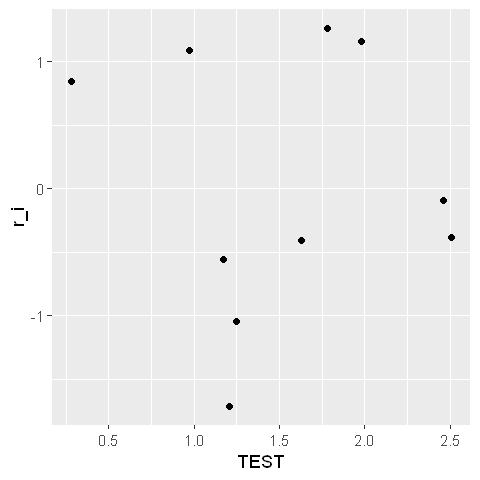

In [33]:
 # residual plot
res.dat_emp_minority <- cbind(dat_emp_minority, rstandard(res_m1_minority))
colnames(res.dat_emp_minority)[c(4)] <- "r_i"

ggplot(res.dat_emp_minority, aes(x = TEST, y = r_i)) + geom_point()

Figure 5.11 Standardized residuals versus TEST: Model 1, white only (144 page)

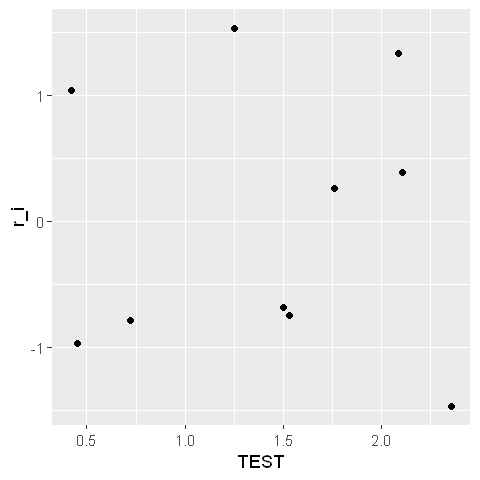

In [34]:
 # residual plot
res.dat_emp_white <- cbind(dat_emp_white, rstandard(res_m1_white))
colnames(res.dat_emp_white)[c(4)] <- "r_i"

ggplot(res.dat_emp_white, aes(x = TEST, y = r_i)) + geom_point()